## Importing libraries 

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Import dataset

In [154]:
df = pd.read_csv('World_Airports.csv')

In [155]:
df.head(3)

,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4212194.002,1,6528,00CA,small_airport,Goldstone (GTS) Airport,35.35474,-116.885329,3038.0,...,NaN,NaN,NaN,CTAF,122.9,6000.0,80.0,ASPH,0.0,0.0
1,-9.034601e+06,3347916.022,2,6589,01FL,small_airport,Cedar Knoll Flying Ranch Airport,28.78190,-81.159203,19.0,...,NaN,NaN,NaN,CTAF,122.9,3000.0,50.0,TURF,1.0,0.0
2,-1.309952e+07,4104773.695,3,6756,04CA,small_airport,Gray Butte Field,34.56390,-117.675003,3020.0,...,NaN,NaN,NaN,CTAF,122.9,5000.0,150.0,ASPH,0.0,0.0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75052 entries, 0 to 75051
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  75052 non-null  float64
 1   Y                  75052 non-null  float64
 2   OBJECTID           75052 non-null  int64  
 3   id                 75052 non-null  int64  
 4   airport_ident      75052 non-null  object 
 5   type               75052 non-null  object 
 6   name               75052 non-null  object 
 7   latitude_deg       75052 non-null  float64
 8   longitude_deg      75052 non-null  float64
 9   elevation_ft       60789 non-null  float64
 10  continent          38826 non-null  object 
 11  iso_country        74793 non-null  object 
 12  iso_region         75052 non-null  object 
 13  municipality       70060 non-null  object 
 14  scheduled_service  75052 non-null  object 
 15  gps_code           41172 non-null  object 
 16  iata_code          886

# Checking null values in the dataset

In [157]:
df.isnull().sum()

X                        0
Y                        0
OBJECTID                 0
id                       0
airport_ident            0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         14263
continent            36226
iso_country            259
iso_region               0
municipality          4992
scheduled_service        0
gps_code             33880
iata_code            66184
local_code           42500
home_link            71451
wikipedia_link       64178
keywords             58385
description          50213
frequency_mhz        64379
runway_length_ft     37233
runway_width_ft      39477
runway_surface       37488
runway_lighted       37053
runway_closed        37053
dtype: int64

# Removing the attributes that are duplicate and not required

In [158]:
df = df.drop(["OBJECTID","id","wikipedia_link","home_link"],axis=1)





# Replacing null values

In [159]:
df.isnull().sum()

X                        0
Y                        0
airport_ident            0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         14263
continent            36226
iso_country            259
iso_region               0
municipality          4992
scheduled_service        0
gps_code             33880
iata_code            66184
local_code           42500
keywords             58385
description          50213
frequency_mhz        64379
runway_length_ft     37233
runway_width_ft      39477
runway_surface       37488
runway_lighted       37053
runway_closed        37053
dtype: int64

In [160]:
mean_elevation_ft = round(df["elevation_ft"].mean(),0)
mean__frequency_mhz = round(df["frequency_mhz"].mean(),0)
mean_runway_length_ftt = round(df["runway_length_ft"].mean(),0)
mean_runway_width_ft = round(df["runway_width_ft"].mean(),0)
mean_runway_lighted = round(df["runway_lighted"].mean(),0)
mean_runway_closed = round(df["runway_closed"].mean(),0)

In [161]:
df["frequency_mhz"]=df["frequency_mhz"].fillna(mean__frequency_mhz)
df["frequency_mhz"]

0        122.9
1        122.9
2        122.9
3        122.8
4        123.0
         ...  
75047    131.0
75048    131.0
75049    131.0
75050    131.0
75051    131.0
Name: frequency_mhz, Length: 75052, dtype: float64

In [162]:
df["runway_closed"]=df["runway_closed"].fillna(mean_runway_closed)
df["runway_closed"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
75047    0.0
75048    0.0
75049    0.0
75050    0.0
75051    0.0
Name: runway_closed, Length: 75052, dtype: float64

In [163]:
df["runway_length_ft"]=df["runway_length_ft"].fillna(mean_runway_length_ftt)
df["runway_length_ft"]

0        6000.0
1        3000.0
2        5000.0
3        3400.0
4        3240.0
          ...  
75047    3051.0
75048    3051.0
75049    3051.0
75050    3051.0
75051    3051.0
Name: runway_length_ft, Length: 75052, dtype: float64

In [164]:
df["runway_lighted"]=df["runway_lighted"].fillna(mean_runway_lighted)
df["runway_lighted"]

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
75047    0.0
75048    0.0
75049    0.0
75050    0.0
75051    0.0
Name: runway_lighted, Length: 75052, dtype: float64

In [165]:
df["runway_width_ft"]=df["runway_width_ft"].fillna(mean_runway_width_ft)
df["runway_width_ft"]

0         80.0
1         50.0
2        150.0
3        100.0
4         45.0
         ...  
75047    104.0
75048    104.0
75049    104.0
75050    104.0
75051    104.0
Name: runway_width_ft, Length: 75052, dtype: float64

In [166]:
df["elevation_ft"]=df["elevation_ft"].fillna(mean_elevation_ft)
df["elevation_ft"]

0        3038.0
1          19.0
2        3020.0
3         100.0
4        2620.0
          ...  
75047    1997.0
75048    1301.0
75049      40.0
75050      11.0
75051       4.0
Name: elevation_ft, Length: 75052, dtype: float64

In [167]:
df.isnull().sum()

X                        0
Y                        0
airport_ident            0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft             0
continent            36226
iso_country            259
iso_region               0
municipality          4992
scheduled_service        0
gps_code             33880
iata_code            66184
local_code           42500
keywords             58385
description          50213
frequency_mhz            0
runway_length_ft         0
runway_width_ft          0
runway_surface       37488
runway_lighted           0
runway_closed            0
dtype: int64

# Converting datatypes

In [168]:
def fill_categorical_nulls_with_most_frequent(df, continent):
    most_frequent_value = df[continent].mode()[0]
    df[continent].fillna(most_frequent_value, inplace=True)

In [169]:
fill_categorical_nulls_with_most_frequent(df, 'continent')

In [170]:
df.isnull().sum()

X                        0
Y                        0
airport_ident            0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft             0
continent                0
iso_country            259
iso_region               0
municipality          4992
scheduled_service        0
gps_code             33880
iata_code            66184
local_code           42500
keywords             58385
description          50213
frequency_mhz            0
runway_length_ft         0
runway_width_ft          0
runway_surface       37488
runway_lighted           0
runway_closed            0
dtype: int64

In [171]:
def fill_categorical_nulls_with_most_frequent(df, categorical_columns):
    for column_name in categorical_columns:
        most_frequent_value = df[column_name].mode()[0]
        df[column_name].fillna(most_frequent_value, inplace=True)

In [172]:
categorical_columns = ['iso_country', 'municipality', 'gps_code','iata_code','local_code','keywords','description','runway_surface'] 

In [173]:
fill_categorical_nulls_with_most_frequent(df, categorical_columns)

In [174]:
df.isnull().sum()

X                    0
Y                    0
airport_ident        0
type                 0
name                 0
latitude_deg         0
longitude_deg        0
elevation_ft         0
continent            0
iso_country          0
iso_region           0
municipality         0
scheduled_service    0
gps_code             0
iata_code            0
local_code           0
keywords             0
description          0
frequency_mhz        0
runway_length_ft     0
runway_width_ft      0
runway_surface       0
runway_lighted       0
runway_closed        0
dtype: int64

In [175]:
df.head(2)

,X,Y,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,...,iata_code,local_code,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4212194.002,00CA,small_airport,Goldstone (GTS) Airport,35.35474,-116.885329,3038.0,AS,US,...,AAA,00CA,Mukho,CTAF,122.9,6000.0,80.0,ASPH,0.0,0.0
1,-9.034601e+06,3347916.022,01FL,small_airport,Cedar Knoll Flying Ranch Airport,28.78190,-81.159203,19.0,AS,US,...,AAA,01FL,Mukho,CTAF,122.9,3000.0,50.0,TURF,1.0,0.0


In [176]:
df.dtypes

X                    float64
Y                    float64
airport_ident         object
type                  object
name                  object
latitude_deg         float64
longitude_deg        float64
elevation_ft         float64
continent             object
iso_country           object
iso_region            object
municipality          object
scheduled_service     object
gps_code              object
iata_code             object
local_code            object
keywords              object
description           object
frequency_mhz        float64
runway_length_ft     float64
runway_width_ft      float64
runway_surface        object
runway_lighted       float64
runway_closed        float64
dtype: object

# Displaying unique values 


In [177]:
df["airport_ident"]=df["airport_ident"].astype("category")
df["type"] = df["type"].astype("category")
df["continent"] = df["continent"].astype("category")
df["name"] = df["name"].astype("category")
df["iso_country"] = df["iso_country"].astype("category")
df["iso_region"]=df["iso_region"].astype("category")
df["municipality"] = df["municipality"].astype("category")
df["scheduled_service"] = df["scheduled_service"].astype("category")
df["gps_code"] = df["gps_code"].astype("category")
df["iata_code"] = df["iata_code"].astype("category")
df["local_code"] = df["local_code"].astype("category")
df["keywords"] = df["keywords"].astype("category")
df["description"] = df["description"].astype("category")
df["runway_surface"] = df["runway_surface"].astype("category")

In [178]:
df.dtypes

X                     float64
Y                     float64
airport_ident        category
type                 category
name                 category
latitude_deg          float64
longitude_deg         float64
elevation_ft          float64
continent            category
iso_country          category
iso_region           category
municipality         category
scheduled_service    category
gps_code             category
iata_code            category
local_code           category
keywords             category
description          category
frequency_mhz         float64
runway_length_ft      float64
runway_width_ft       float64
runway_surface       category
runway_lighted        float64
runway_closed         float64
dtype: object

In [179]:
df["airport_ident"].unique()

['00CA', '01FL', '04CA', '04MS', '04NV', ..., 'ZYXW', 'ZYYY', 'ZZ-0001', 'ZZ-0002', 'ZZZW']
Length: 75052
Categories (75052, object): ['0.00E+00', '00A', '00AA', '00AK', ..., 'mdwo', 'qfx', 'rjns', 'spgl']

In [180]:
#df["type"]=df["type"].cat.codes
df["airport_ident"]=df["airport_ident"].cat.codes
df["name"]=df["name"].cat.codes
df["continent"]=df["continent"].cat.codes
df["iso_country"]=df["iso_country"].cat.codes
df["iso_region"]=df["iso_region"].cat.codes
df["municipality"]=df["municipality"].cat.codes
df["scheduled_service"]=df["scheduled_service"].cat.codes
df["gps_code"]=df["gps_code"].cat.codes
df["iata_code"]=df["iata_code"].cat.codes
df["local_code"]=df["local_code"].cat.codes
df["keywords"]=df["keywords"].cat.codes
df["description"]=df["description"].cat.codes
df["runway_surface"]=df["runway_surface"].cat.codes


In [181]:
df.head()

,X,Y,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,...,iata_code,local_code,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4212194.002,9,small_airport,25466,35.354740,-116.885329,3038.0,2,226,...,0,10,8942,485,122.9,6000.0,80.0,18,0.0,0.0
1,-9.034601e+06,3347916.022,80,small_airport,11782,28.781900,-81.159203,19.0,2,226,...,0,83,8942,485,122.9,3000.0,50.0,463,1.0,0.0
2,-1.309952e+07,4104773.695,275,small_airport,26007,34.563900,-117.675003,3020.0,2,226,...,0,282,8942,485,122.9,5000.0,150.0,18,0.0,0.0
3,-1.011189e+07,3887413.902,300,small_airport,45952,32.940537,-90.836683,100.0,2,226,...,0,307,8942,2102,122.8,3400.0,100.0,39,0.0,0.0
4,-1.287577e+07,4267030.602,306,small_airport,34416,35.755501,-115.665001,2620.0,2,226,...,0,313,8942,2102,123.0,3240.0,45.0,18,1.0,0.0


## Draw a bar plot

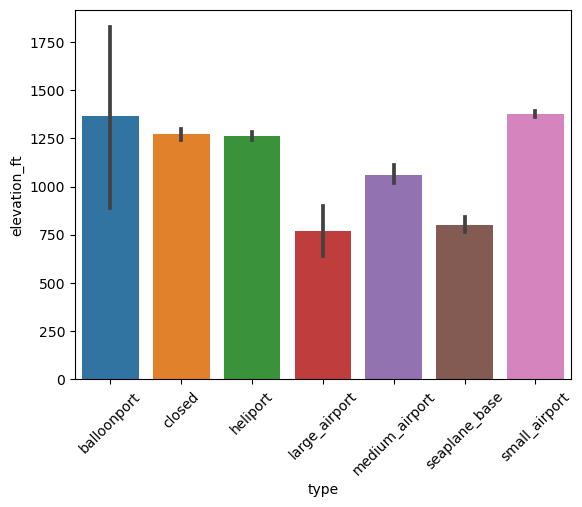

In [182]:
bar=sns.barplot(x="type",y="elevation_ft",data=df)
plt.xticks(rotation=45)
plt.show(bar)

In [183]:
dfx = df.drop("type", axis = 1)
dfx.head(2)

,X,Y,airport_ident,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,...,iata_code,local_code,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4212194.002,9,25466,35.35474,-116.885329,3038.0,2,226,2694,...,0,10,8942,485,122.9,6000.0,80.0,18,0.0,0.0
1,-9.034601e+06,3347916.022,80,11782,28.78190,-81.159203,19.0,2,226,2699,...,0,83,8942,485,122.9,3000.0,50.0,463,1.0,0.0


In [184]:
dfy = df["type"]
dfy.head(2)

0    small_airport
1    small_airport
Name: type, dtype: category
Categories (7, object): ['balloonport', 'closed', 'heliport', 'large_airport', 'medium_airport', 'seaplane_base', 'small_airport']

## Normalize the data set :

In [185]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_dfx = pd.DataFrame(scaler.fit_transform(dfx),columns = dfx.columns)
scaler_dfx.head(5)

,X,Y,airport_ident,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,...,iata_code,local_code,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,0.175048,0.598531,0.000120,0.358363,0.725642,0.175048,0.230926,0.4,0.930041,0.936392,...,0.0,0.000322,0.548219,0.211698,0.091716,0.200000,0.008889,0.030822,0.0,0.0
1,0.274328,0.572608,0.001066,0.165799,0.687594,0.274328,0.068945,0.4,0.930041,0.938130,...,0.0,0.002671,0.548219,0.211698,0.091716,0.100000,0.005556,0.792808,1.0,0.0
2,0.172854,0.595309,0.003664,0.365976,0.721065,0.172854,0.229960,0.4,0.930041,0.936392,...,0.0,0.009075,0.548219,0.211698,0.091716,0.166667,0.016667,0.030822,0.0,0.0
3,0.247435,0.588790,0.003997,0.646647,0.711667,0.247435,0.073291,0.4,0.930041,0.943691,...,0.0,0.009879,0.548219,0.917503,0.091642,0.113333,0.011111,0.066781,0.0,0.0
4,0.178440,0.600176,0.004077,0.484309,0.727962,0.178440,0.208499,0.4,0.930041,0.946472,...,0.0,0.010072,0.548219,0.917503,0.091791,0.108000,0.005000,0.030822,1.0,0.0


In [186]:
dfx.columns

Index(['X', 'Y', 'airport_ident', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'keywords', 'description', 'frequency_mhz',
       'runway_length_ft', 'runway_width_ft', 'runway_surface',
       'runway_lighted', 'runway_closed'],
      dtype='object')

## Divide the dataset to training and testing sets:


In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train,x_test,y_train,y_test=train_test_split(scaler_dfx,dfy,test_size=0.2,random_state=4)

In [189]:
scaler_dfx.shape[0]

75052

In [190]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
KNN = KNeighborsClassifier()
KNN

KNeighborsClassifier()

In [192]:
Knn = KNN.fit(dfx,dfy)
Knn

KNeighborsClassifier()

In [193]:
pred_test=KNN.predict(dfx)
pred_test

array(['small_airport', 'heliport', 'small_airport', ..., 'small_airport',
       'small_airport', 'closed'], dtype=object)

In [194]:
from sklearn.metrics import accuracy_score
acuur=round(accuracy_score(dfy,pred_test)*100,0)
acuur

74.0